# Actividad - Ecuaciones diferenciales

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
%matplotlib inline

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [3]:
def f(x, t):
    return x / (t+1)

Grafique con condición inicial $x_0 = 2$

In [4]:
t = np.linspace(0, 1000, 10000)
x0 = 2
x1 = odeint(f, x0, t)

In [5]:
x1 = x1[:,0]

In [6]:
x1

array([2.00000000e+00, 2.20002000e+00, 2.40004000e+00, ...,
       2.00159996e+03, 2.00179998e+03, 2.00200000e+03])

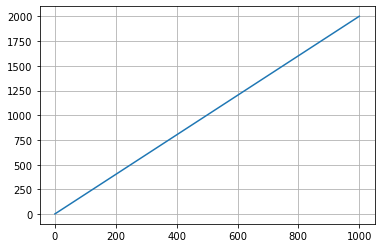

In [7]:
plt.figure()
plt.plot(t, x1)
plt.grid()

In [8]:
t2 = [0, 2000]

In [9]:
def df(x, t):
    return x/(t+1)

In [10]:
solx = solve_ivp(df, t2, [2], max_step=0.1)

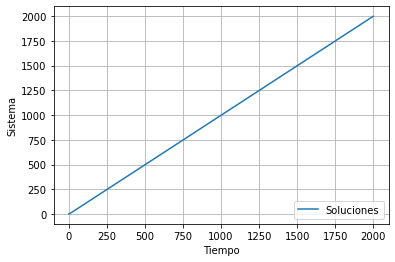

In [11]:
plt.figure()
plt.plot(solx.t, solx.y[0,:], label="Soluciones")
plt.xlabel("Tiempo")
plt.ylabel("Sistema")
plt.legend(loc="lower right")
plt.grid()

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [36]:
x0 = 0.5
dx0 = 0.1
w0 = 3

In [37]:
def dX(t, X):
    x = X[0]
    dx = X[1]
    return np.asarray([dx, -w0**2*x])

In [42]:
tspan = [0, 10]
solx = solve_ivp(dX, tspan, [x0, dx0], max_step=0.1)

Grafique

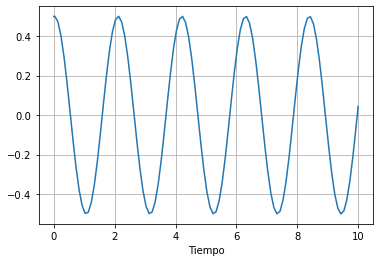

In [43]:
plt.figure()
plt.plot(solx.t, solx.y[0,:])
plt.xlabel("Tiempo")
plt.grid()

Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [46]:
def fxa(t, w0, x0, dx0):
    C1 = x0
    C2 = dx0/w0
    return C1*np.cos(w0*t) + C2*np.sin(w0*t)

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

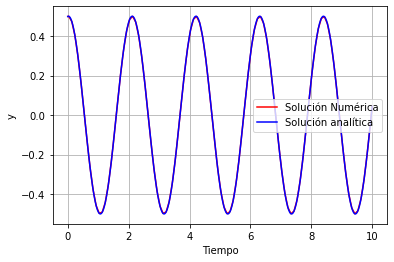

In [48]:
plt.figure()

plt.plot(solx.t, solx.y[0, :], "r",  label="Solución Numérica")

t = np.linspace(0, 10, 1000)
posA = fxa(t, w0, x0, dx0)
plt.plot(t, posA, "b", label="Solución analítica")

plt.xlabel("Tiempo")
plt.ylabel("y")
plt.legend(loc="best")
plt.grid()